In [1]:
#import modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt
from learntools.time_series.style import *


In [2]:
#load data
data=pd.read_csv('GlobalTemperatures.csv').dropna()

In [21]:
#showing basic data inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         1992 non-null   datetime64[ns]
 1   LandAverageTemperature                     1992 non-null   float64       
 2   LandAverageTemperatureUncertainty          1992 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns]

In [22]:
#show the basic statistics of data
data[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature", "LandAndOceanAverageTemperature", 
      "LandAverageTemperatureUncertainty","LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty",
     "LandAndOceanAverageTemperatureUncertainty"]].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperatureUncertainty,LandMinTemperatureUncertainty,LandAndOceanAverageTemperatureUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,14.350601,2.743595,15.212566,0.276663,0.479782,0.431849,0.128532
std,4.263193,4.309579,4.155835,1.274093,0.224030,0.583203,0.445838,0.073587
min,0.404000,5.900000,-5.407000,12.475000,0.034000,0.044000,0.045000,0.042000
25%,4.430000,10.212000,-1.334500,14.047000,0.099750,0.142000,0.155000,0.063000
50%,8.850500,14.760000,2.949500,15.251000,0.230000,0.252000,0.279000,0.122000
75%,12.858500,18.451500,6.778750,16.396250,0.347250,0.539000,0.458250,0.151000
max,15.482000,21.320000,9.715000,17.611000,1.492000,4.373000,3.498000,0.457000


In [4]:
#change the type of 'dt' column
data['dt']=pd.to_datetime(data['dt'],format='%Y-%m-%d')

In [5]:
#change data from monthly to yearly
y_data=data.groupby([pd.Grouper(key="dt", freq="Y")]).mean().reset_index()

In [6]:
#prepared the yearly data
y_data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-12-31,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1,1851-12-31,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
2,1852-12-31,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
3,1853-12-31,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
4,1854-12-31,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
...,...,...,...,...,...,...,...,...,...
161,2011-12-31,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
162,2012-12-31,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
163,2013-12-31,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667
164,2014-12-31,9.570667,0.090167,15.313583,0.111667,3.877750,0.139000,15.913000,0.063167


In [7]:
#create quarterly data
q_data=data.groupby([pd.Grouper(key="dt", freq="Q")]).mean().reset_index()

In [ ]:
#q_data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-03-31,2.924667,1.111667,9.519667,2.382000,-2.467333,1.951667,13.488000,0.374000
1,1850-06-30,10.123667,0.632000,15.845000,2.075667,3.978333,1.177667,15.509000,0.253667
2,1850-09-30,13.345333,0.697000,17.852000,2.537000,6.651000,1.223333,16.462333,0.257333
3,1850-12-31,5.209000,1.065000,10.690000,2.584667,-0.304667,1.932000,14.009333,0.347667
4,1851-03-31,3.043667,1.064333,10.088667,2.363333,-1.550000,2.032000,13.491000,0.351000
...,...,...,...,...,...,...,...,...,...
659,2014-12-31,7.297667,0.095667,12.846667,0.127667,1.890333,0.121333,15.112667,0.061667
660,2015-03-31,5.095000,0.103667,10.862667,0.092667,-0.587333,0.096333,14.670667,0.064667
661,2015-06-30,12.043333,0.079000,17.923000,0.129000,6.114000,0.156000,16.708667,0.058667
662,2015-09-30,14.268333,0.079000,20.149333,0.102333,8.510000,0.208000,17.416333,0.057667


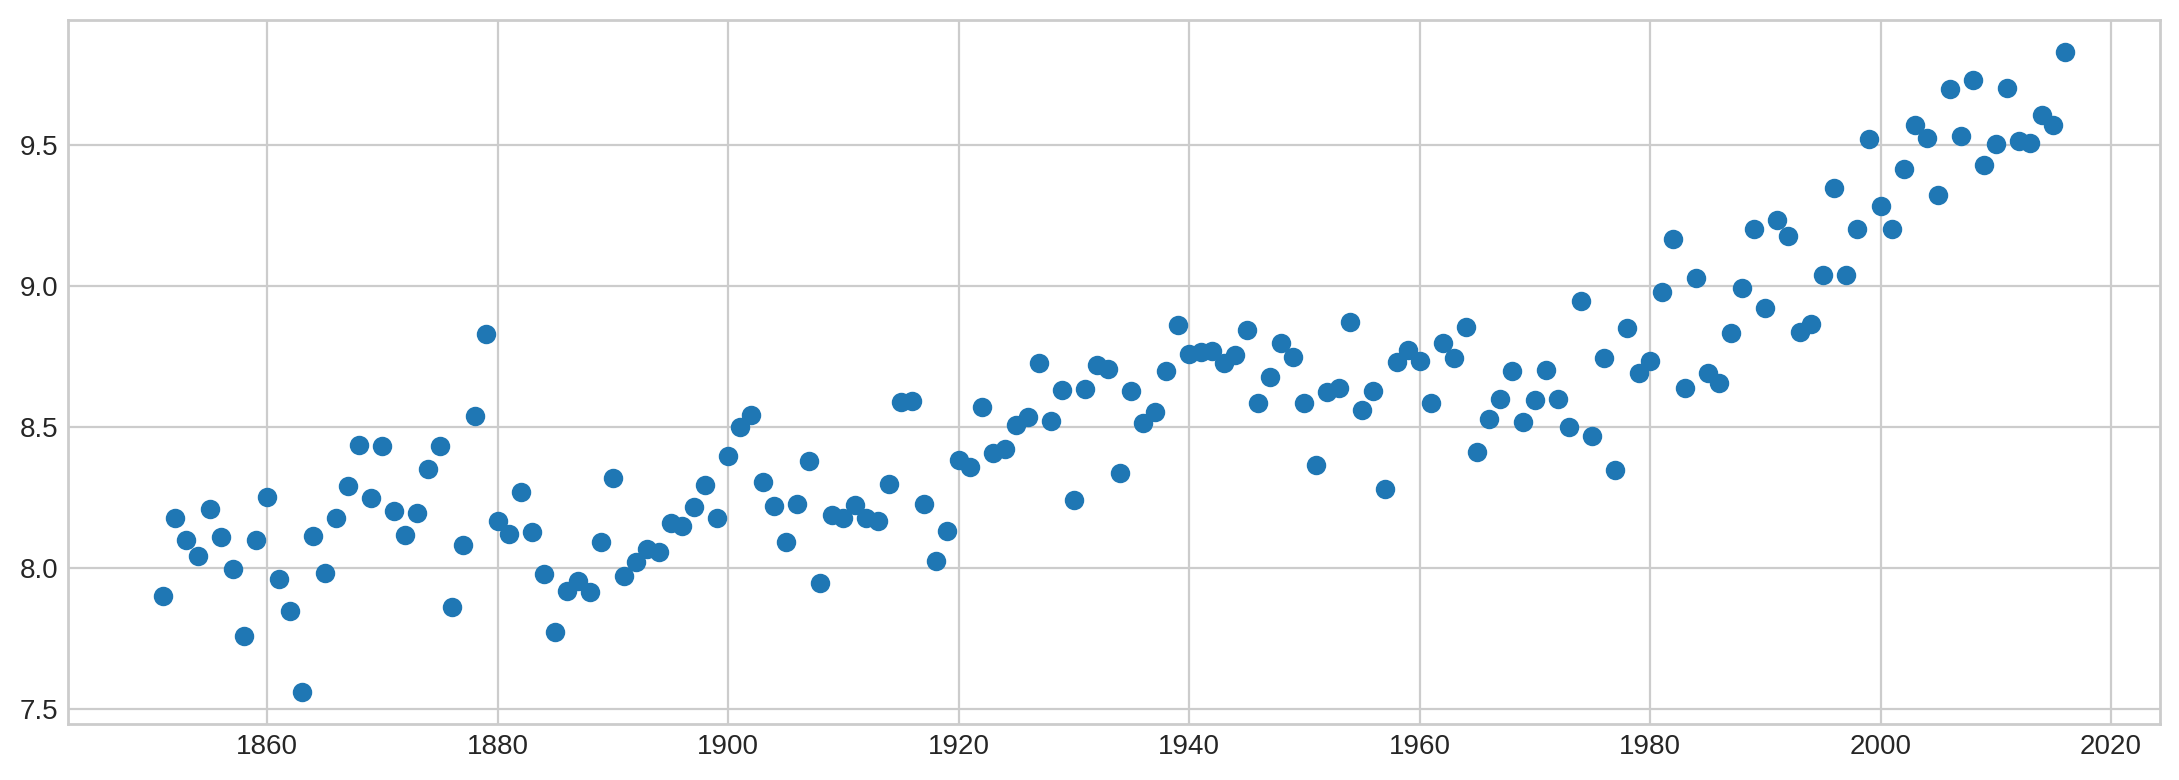

In [9]:
#show the yearly average temperature data
plt.scatter(data = y_data, x = 'dt',y = 'LandAverageTemperature')
plt.show()

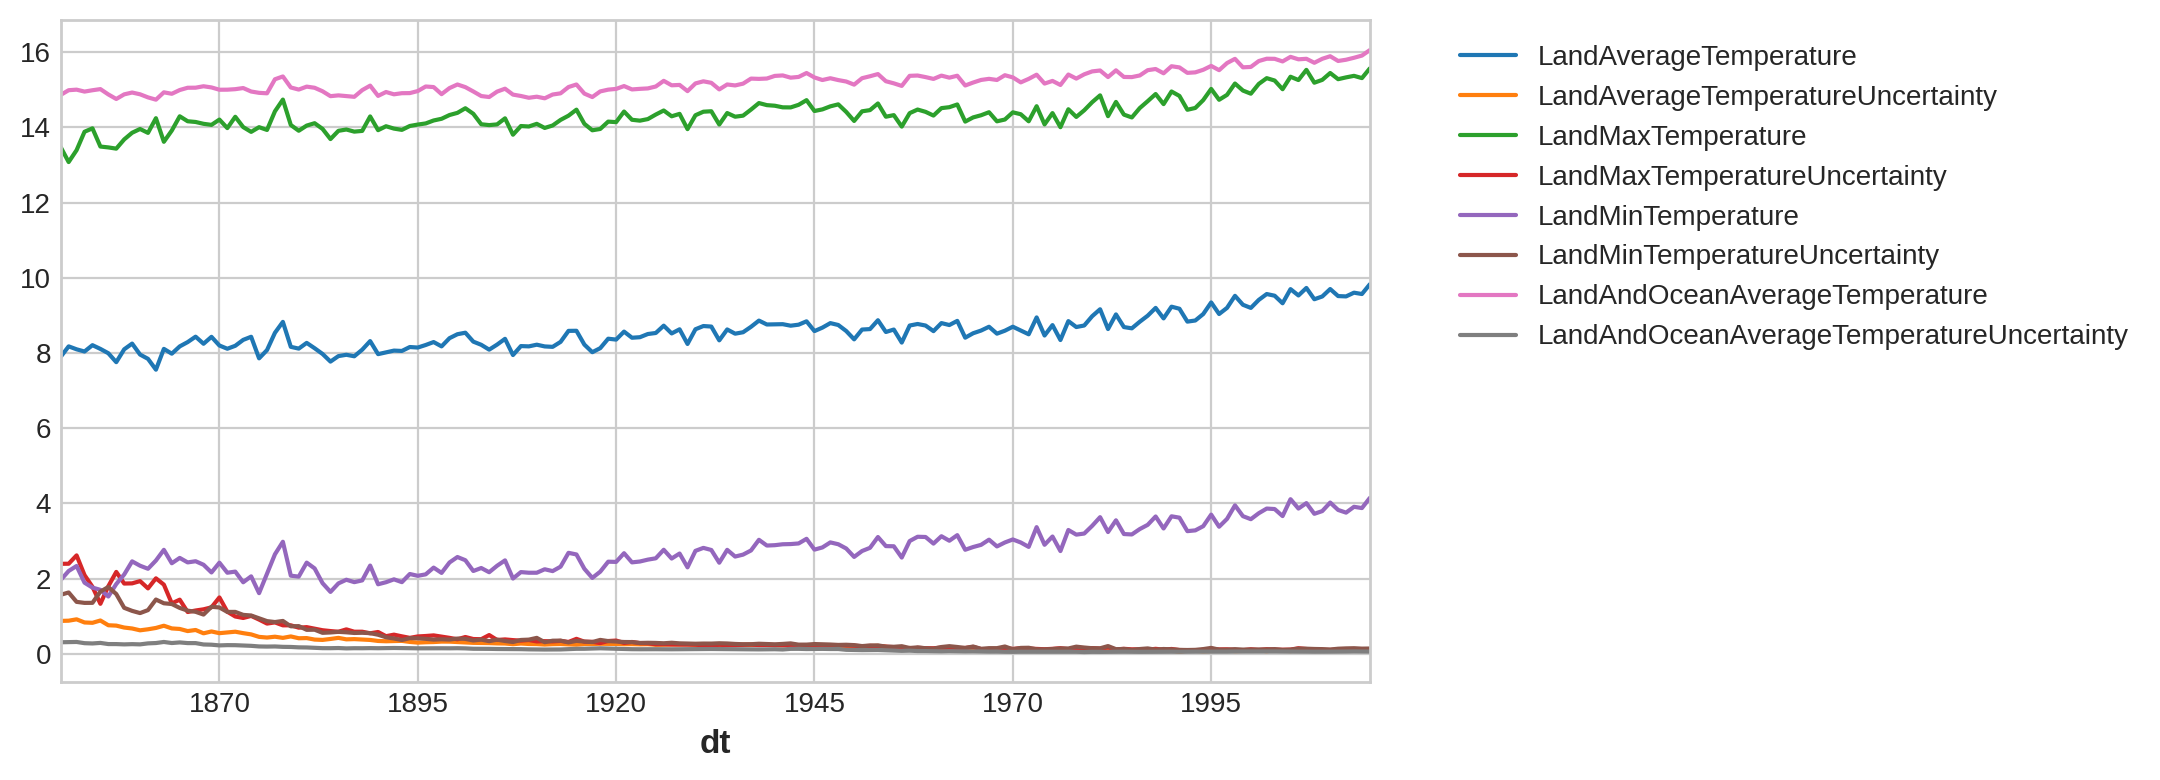

<Figure size 6000x6000 with 0 Axes>

In [25]:
#show the trend of every categroy
y_data.plot("dt")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.figure(figsize=(60,60))
plt.show()

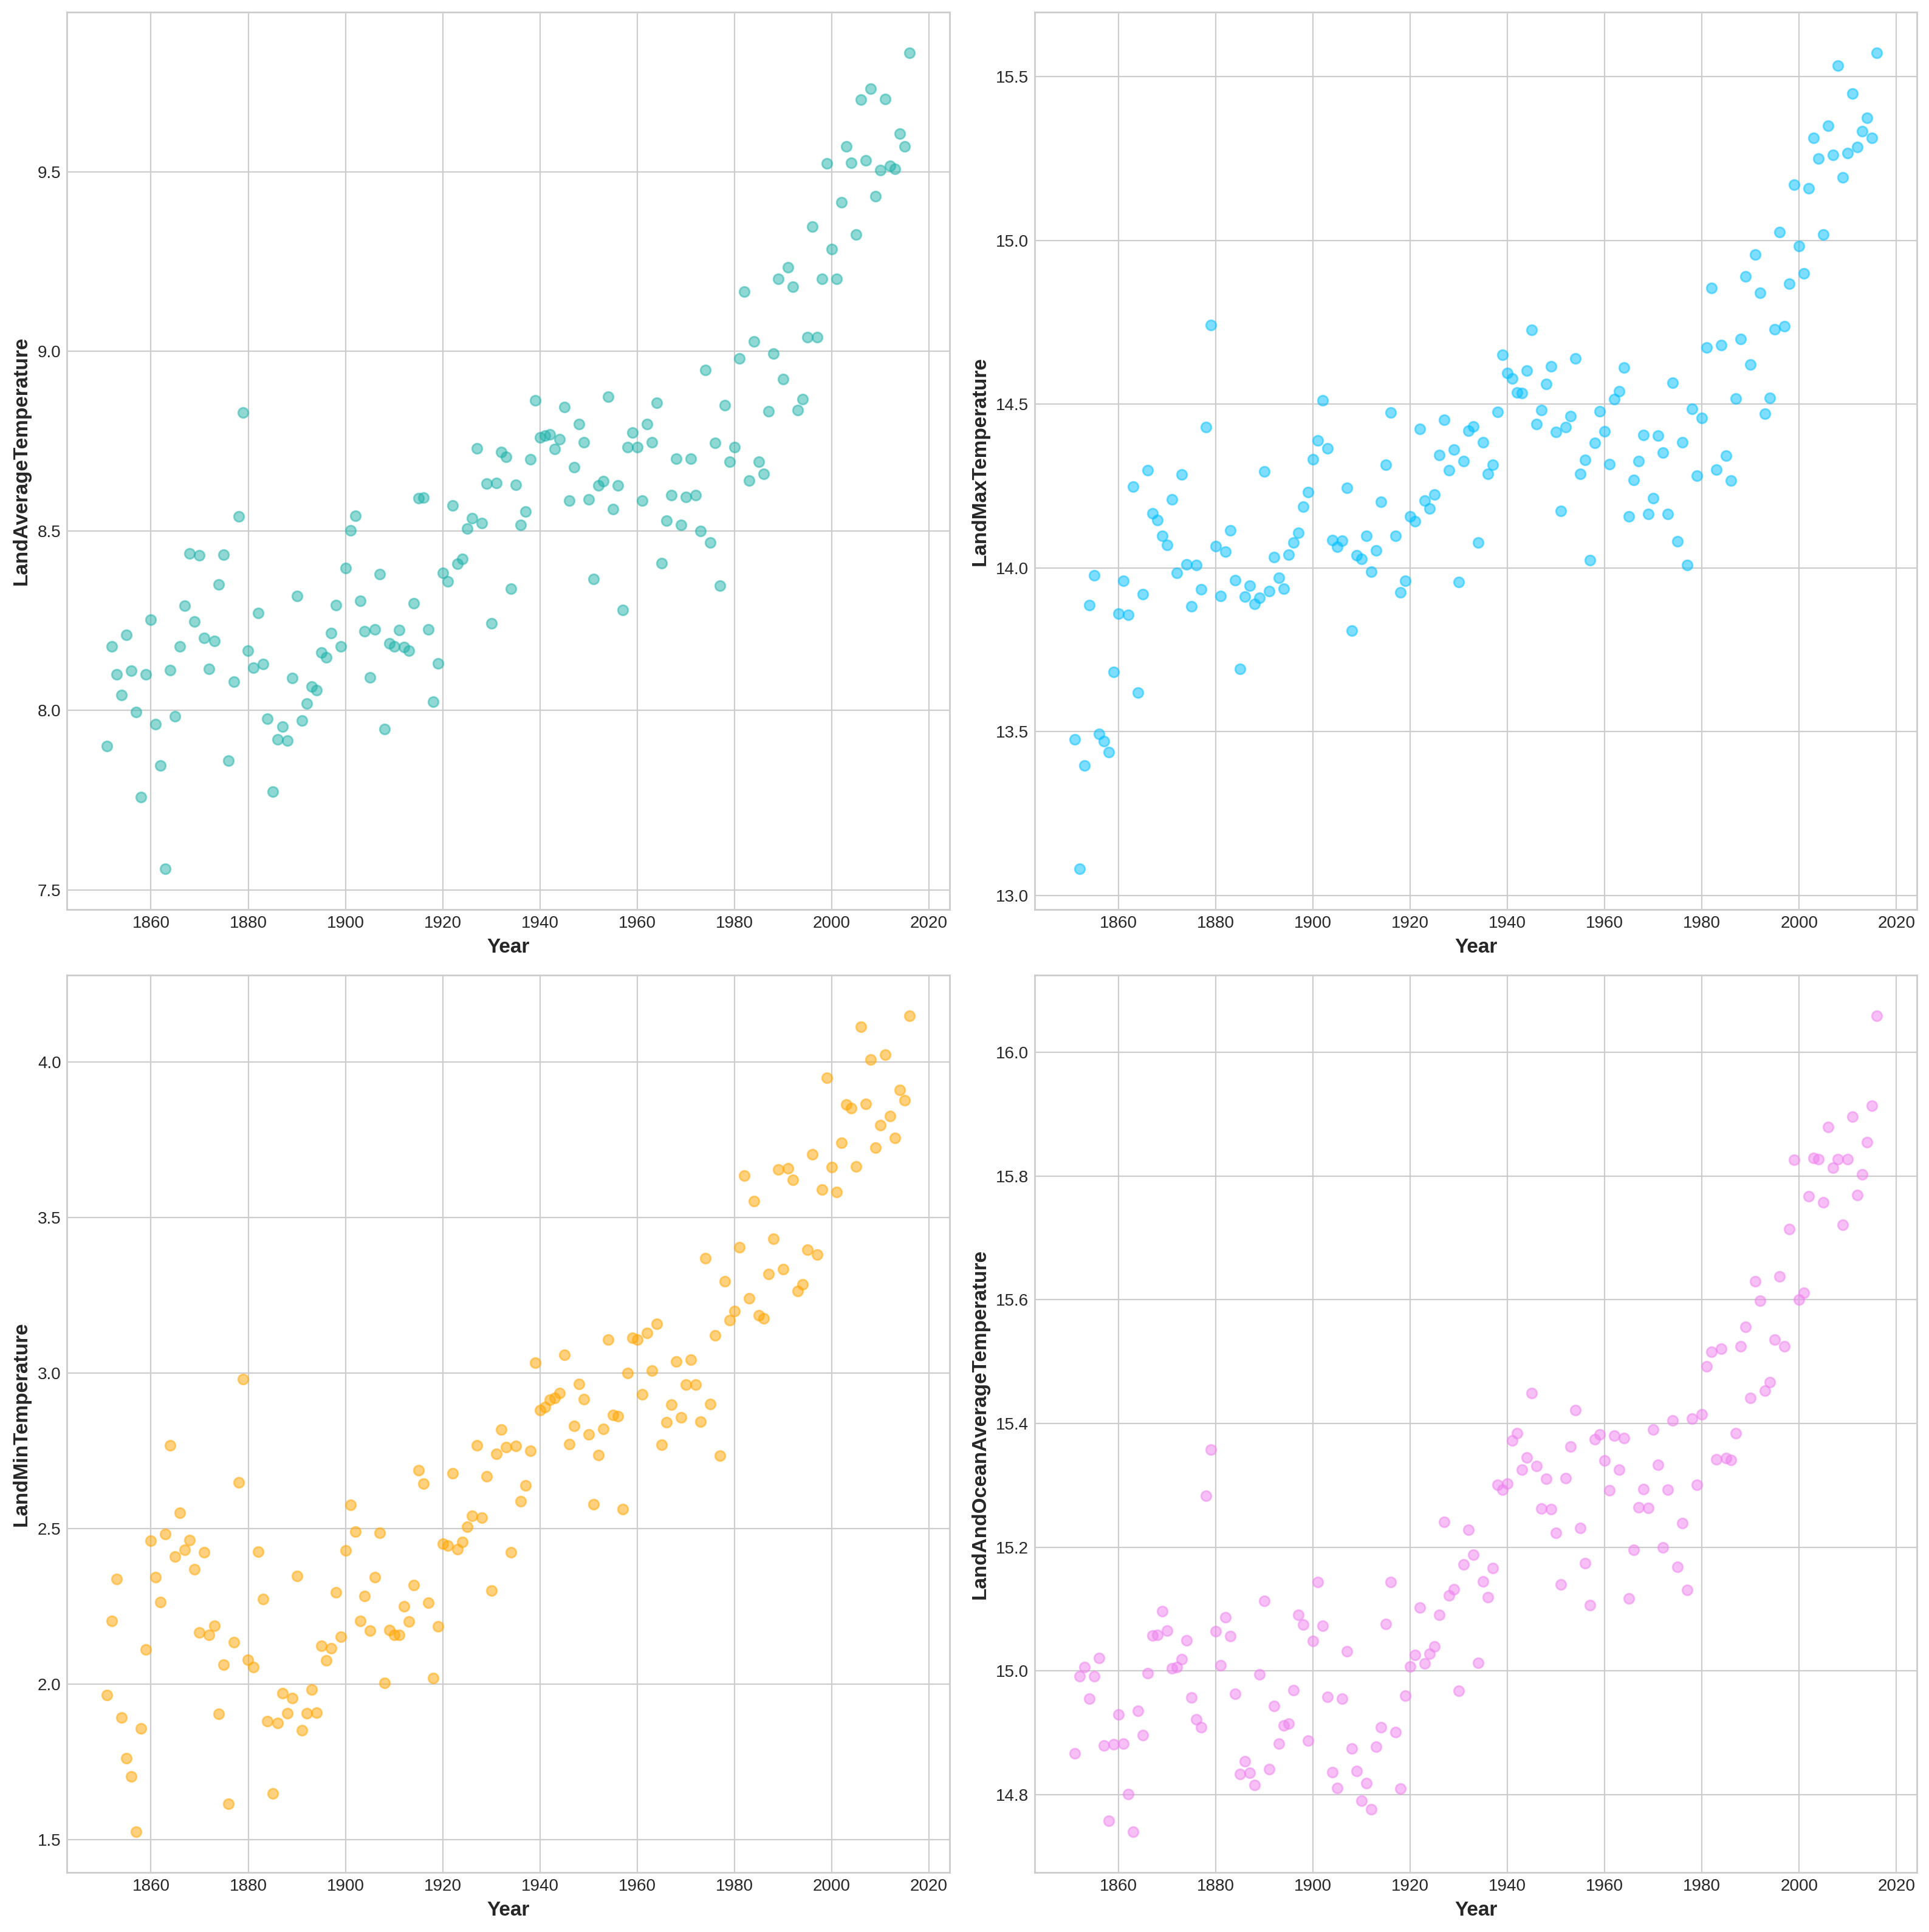

In [28]:
#use scatterplots to show the trend of LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
fig=plt.figure(num=1, figsize=(16, 16))
type(fig)

ax1 = fig.add_subplot(221)

ax1.scatter(x=y_data["dt"], y=y_data["LandAverageTemperature"],color=["lightseagreen"], alpha=0.5)
type(ax1)


ax2 = fig.add_subplot(222)
ax2.scatter(x=y_data["dt"], y=y_data["LandMaxTemperature"],color=["deepskyblue"],alpha=0.5)

ax3 = fig.add_subplot(223)
ax3.scatter(x=y_data["dt"], y=y_data["LandMinTemperature"],color=["orange"],alpha=0.5)

ax4 = fig.add_subplot(224)
ax4.scatter(x=y_data["dt"], y=y_data["LandAndOceanAverageTemperature"],color=["violet"],alpha=0.5)


ax1.set_xlabel("Year") 
ax1.set_ylabel("LandAverageTemperature") 

ax2.set_xlabel("Year") 
ax2.set_ylabel("LandMaxTemperature") 

ax3.set_xlabel("Year") 
ax3.set_ylabel("LandMinTemperature") 

ax4.set_xlabel("Year") 
ax4.set_ylabel("LandAndOceanAverageTemperature") 
plt.show()

In [11]:
#X

In [14]:
#define x and y, and X_fore as the forwards prediction predictor variable
from statsmodels.tsa.deterministic import DeterministicProcess

average_temperature = y_data['LandAverageTemperature']
y = average_temperature.copy()  # the target

dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)


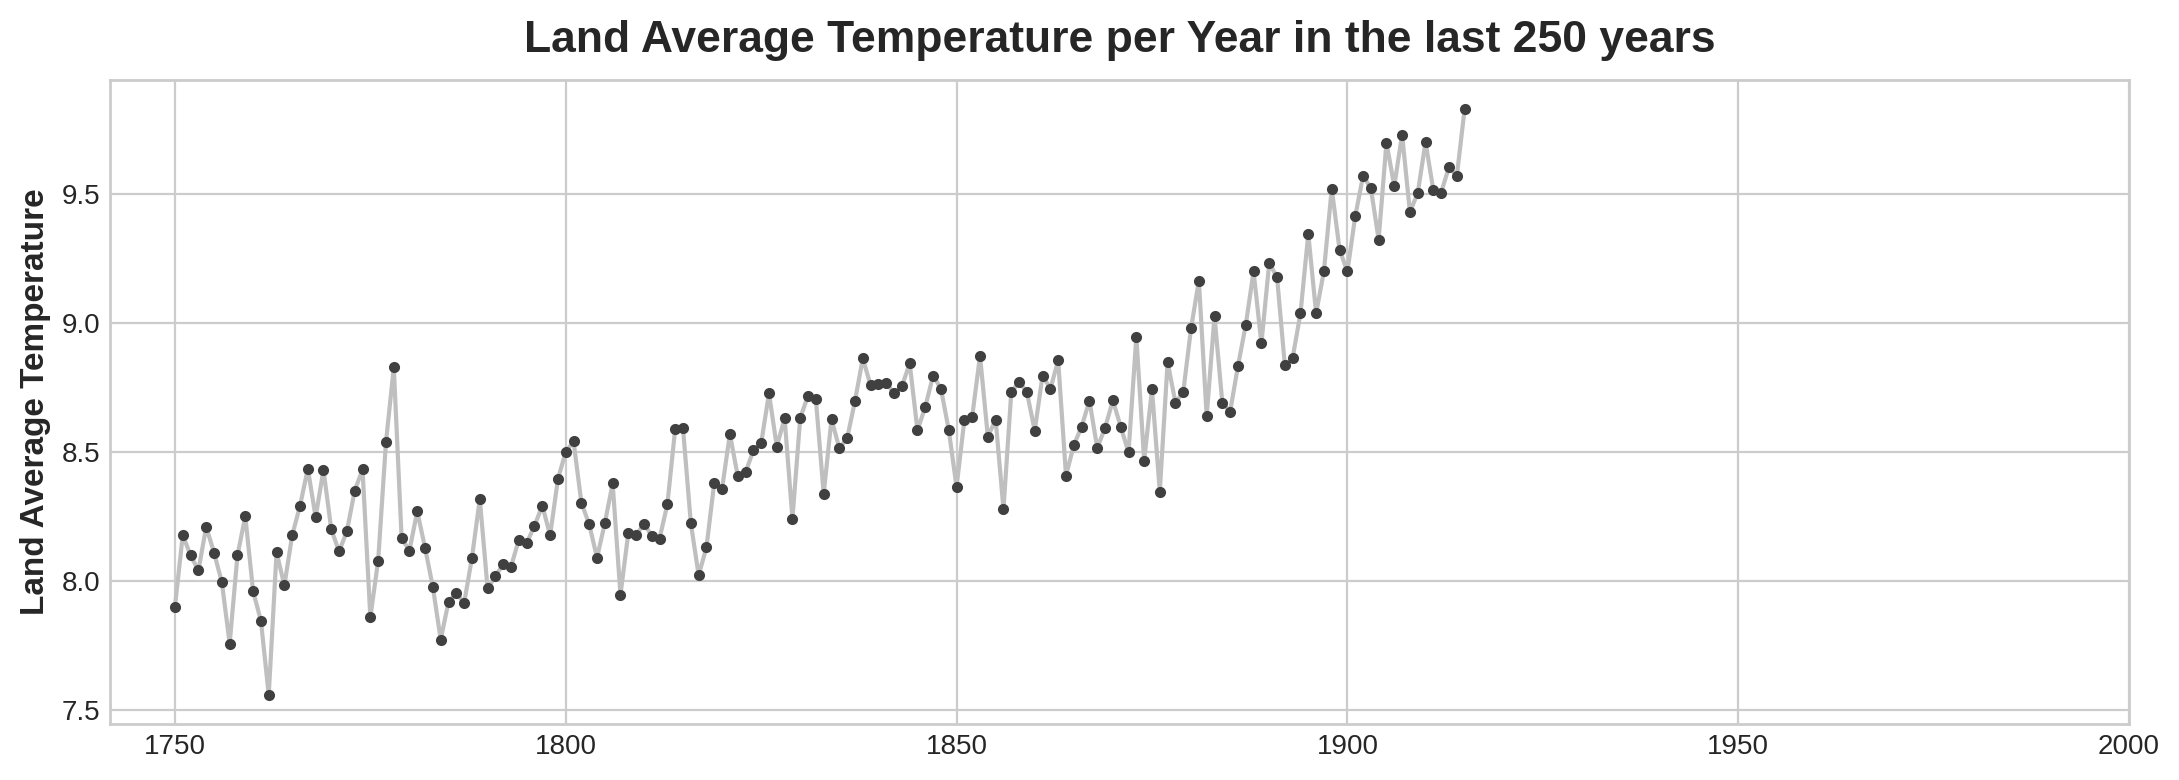

In [15]:
#plot the yearly temperature change
ax = y_data['LandAverageTemperature'].plot(**plot_params)
ax.set(title="Land Average Temperature per Year in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()


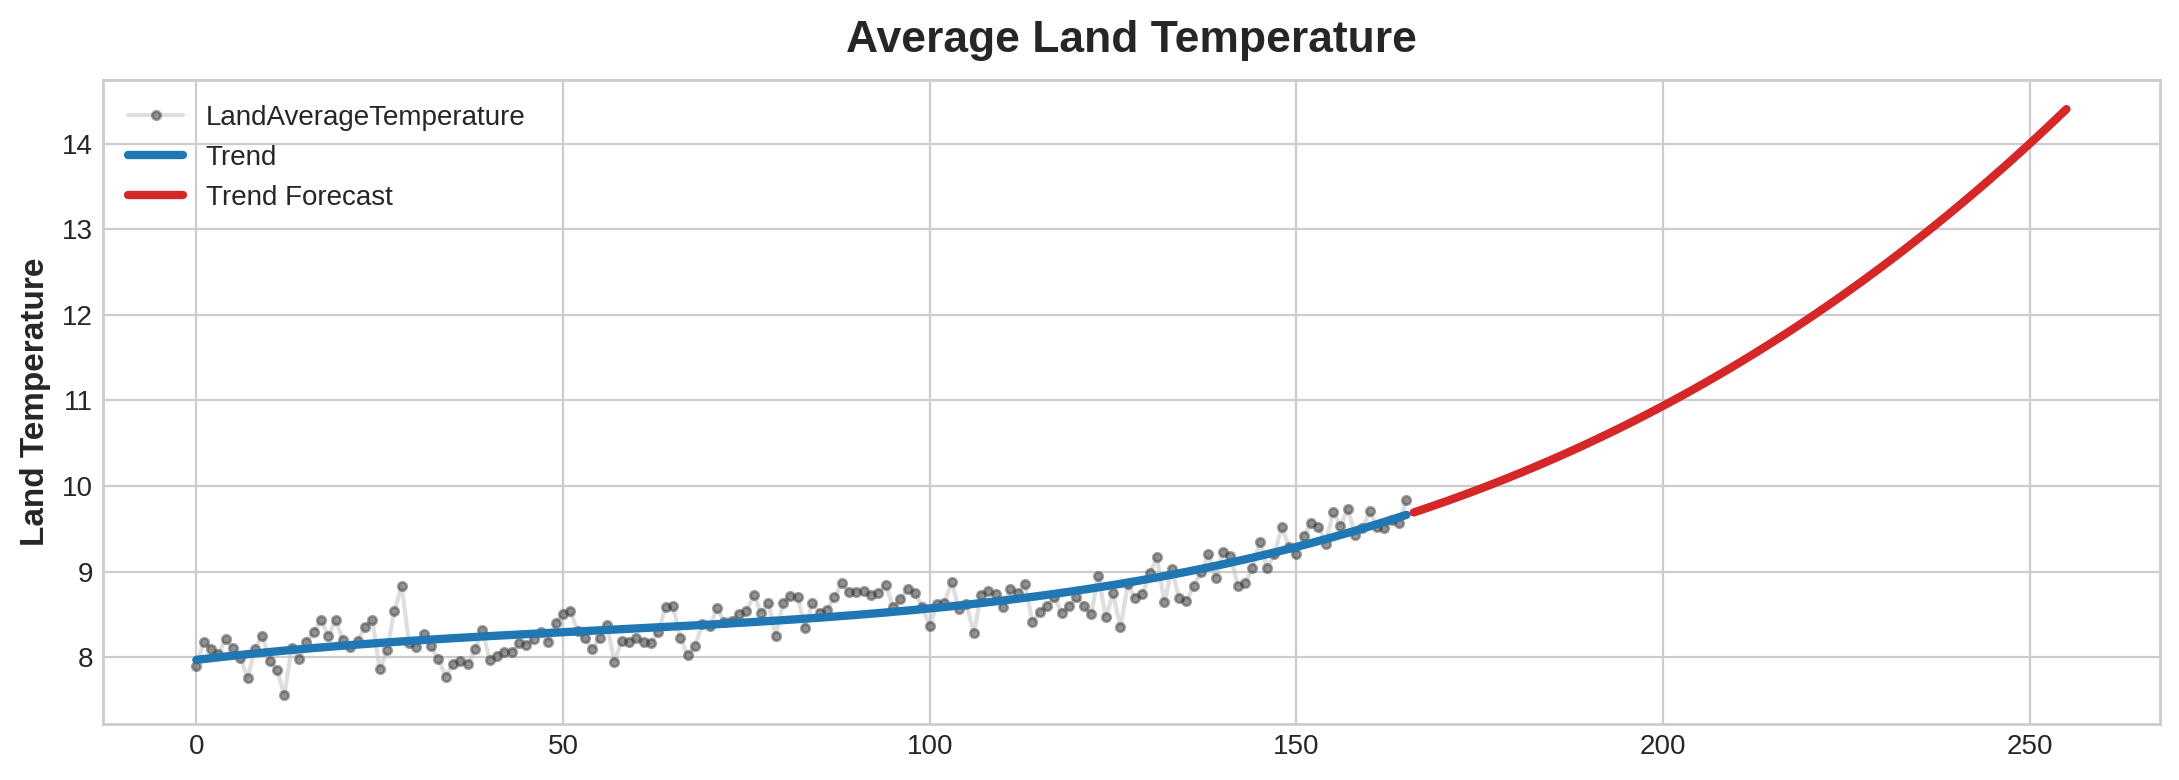

In [18]:
#set up the linear regression model and make prediction
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index) #predict for current
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)# predict for future

ax = y.plot(**plot_params, alpha=0.5, title="Average Land Temperature", ylabel="Land Temperature")# plot our real data point
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0') #plot currenct prediction
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3') #plot future prediction
ax.legend();